### Reading csv file using pandas and printing the first five rows of dataset

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


### Printing the last five rows of dataset

In [4]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


### Displaying the dimensions (rows, columns) of the dataset

In [5]:
df.shape

(1000, 10)

### Summary of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


### Descriptive statistics of the Dataset

In [7]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


### Total Number of missing values in each column

In [3]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

### Total Number of duplicated rows in dataset

In [11]:
df.duplicated().sum()

np.int64(0)

### Finding which columns are unique in dataset

In [15]:
for col in df.columns:
    if df[col].is_unique:
        print({col})



{'Historical_Cost_of_Ride'}


### Number of unique values in each column of the Dataset

In [3]:
df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

### Displaying the datatypes of each column

In [13]:
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object


### Outlier detection using the IQR method for each numeric column in the dataset

In [17]:
outlier_summary = {}

for col in df.select_dtypes(include=['float64','int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

print("Outliers count per column:\n", outlier_summary)

Outliers count per column:
 {'Number_of_Riders': 0, 'Number_of_Drivers': 10, 'Number_of_Past_Rides': 0, 'Average_Ratings': 0, 'Expected_Ride_Duration': 0, 'Historical_Cost_of_Ride': 0}


### Visualization of numeric columns with boxplots to spot outliers

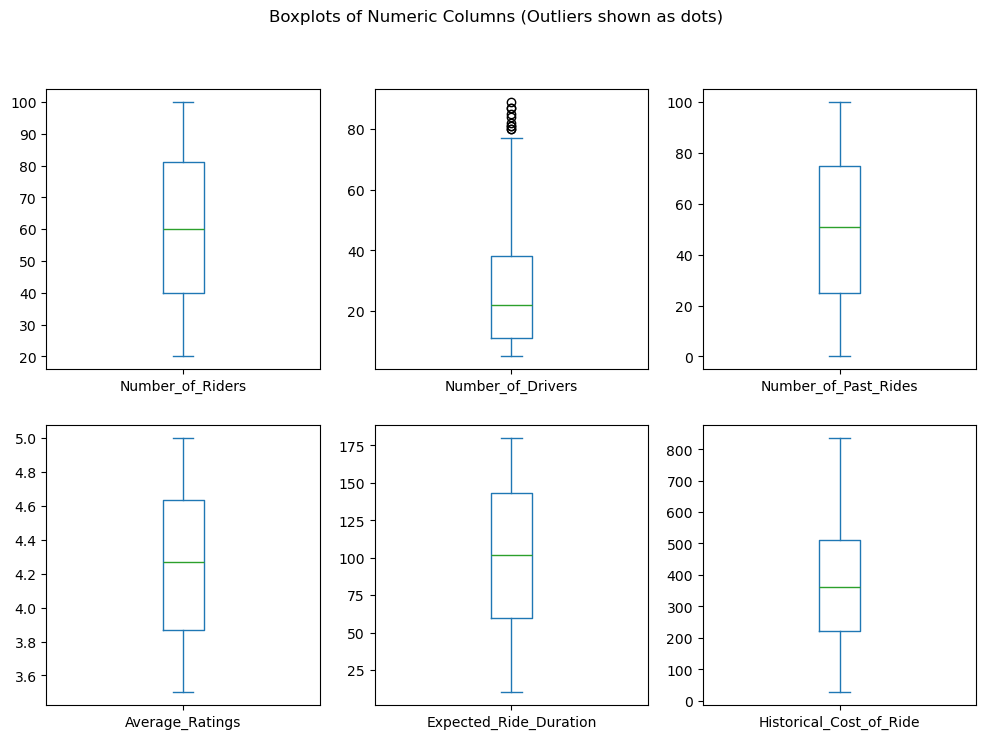

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df.select_dtypes(include=['float64','int64']).plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))
plt.suptitle("Boxplots of Numeric Columns (Outliers shown as dots)")
plt.show()


# KPI IMPLEMENTATION


## 1. Revenue
### Calculating the total revenue earned assuming all rides are completed at historical prices.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dynamic_pricing.csv')

df['Revenue'] = df['Historical_Cost_of_Ride'] * df['Number_of_Riders']

print(df[['Number_of_Riders', 'Historical_Cost_of_Ride', 'Revenue']])
print("\nTotal Revenue =", df['Revenue'].sum())

     Number_of_Riders  Historical_Cost_of_Ride       Revenue
0                  90               284.257273  25583.154572
1                  58               173.874753  10084.735659
2                  42               329.795469  13851.409696
3                  89               470.201232  41847.909626
4                  78               579.681422  45215.150944
..                ...                      ...           ...
995                33                91.389526   3015.854357
996                84               424.155987  35629.102883
997                44               157.364830   6924.052534
998                53               279.095048  14792.037557
999                78               655.065106  51095.078232

[1000 rows x 3 columns]

Total Revenue = 22514545.017633334


## 2.Profit
### Computing the profit for each ride assuming operational cost is 70% of the ride price.


In [2]:
df['Cost_per_Ride'] = df['Historical_Cost_of_Ride'] * 0.7
df['Profit'] = (df['Historical_Cost_of_Ride'] - df['Cost_per_Ride']) * df['Number_of_Riders']

print(df[['Number_of_Riders', 'Historical_Cost_of_Ride', 'Profit']])
print("\nTotal Profit =", df['Profit'].sum())

     Number_of_Riders  Historical_Cost_of_Ride        Profit
0                  90               284.257273   7674.946372
1                  58               173.874753   3025.420698
2                  42               329.795469   4155.422909
3                  89               470.201232  12554.372888
4                  78               579.681422  13564.545283
..                ...                      ...           ...
995                33                91.389526    904.756307
996                84               424.155987  10688.730865
997                44               157.364830   2077.215760
998                53               279.095048   4437.611267
999                78               655.065106  15328.523469

[1000 rows x 3 columns]

Total Profit = 6754363.505290002


## 3.Revenue Lift
### Calculating the percentage increase in revenue using recommended (dynamic) prices compared to baseline.

In [7]:
df['Recommended_Price'] = df['Historical_Cost_of_Ride'] * 1.1
df['Revenue_Recommended'] = df['Recommended_Price'] * df['Number_of_Riders']


df['Revenue'] = df['Historical_Cost_of_Ride'] * df['Number_of_Riders']

df['Revenue_Lift_%'] = (df['Revenue_Recommended'] - df['Revenue']) / df['Revenue'] * 100

print(df[['Number_of_Riders', 'Revenue', 'Revenue_Recommended', 'Revenue_Lift_%']])
print("\nAverage Revenue Lift % =", df['Revenue_Lift_%'].mean())

     Number_of_Riders       Revenue  Revenue_Recommended  Revenue_Lift_%
0                  90  25583.154572         28141.470029            10.0
1                  58  10084.735659         11093.209225            10.0
2                  42  13851.409696         15236.550666            10.0
3                  89  41847.909626         46032.700588            10.0
4                  78  45215.150944         49736.666039            10.0
..                ...           ...                  ...             ...
995                33   3015.854357          3317.439793            10.0
996                84  35629.102883         39192.013171            10.0
997                44   6924.052534          7616.457788            10.0
998                53  14792.037557         16271.241313            10.0
999                78  51095.078232         56204.586055            10.0

[1000 rows x 4 columns]

Average Revenue Lift % = 10.000000000000007


## 4.Gross Margin
### Computing the gross margin percentage as revenue minus cost over revenue for each ride.

In [6]:
df['Cost_per_Ride'] = df['Historical_Cost_of_Ride'] * 0.7
df['Baseline_Revenue'] = df['Historical_Cost_of_Ride'] * df['Number_of_Riders']

df['Gross_Margin_%'] = (df['Baseline_Revenue'] - (df['Cost_per_Ride'] * df['Number_of_Riders'])) / df['Baseline_Revenue'] * 100

print(df[['Number_of_Riders', 'Baseline_Revenue', 'Gross_Margin_%']])
print("\nAverage Gross Margin % =", df['Gross_Margin_%'].mean())

     Number_of_Riders  Baseline_Revenue  Gross_Margin_%
0                  90      25583.154572            30.0
1                  58      10084.735659            30.0
2                  42      13851.409696            30.0
3                  89      41847.909626            30.0
4                  78      45215.150944            30.0
..                ...               ...             ...
995                33       3015.854357            30.0
996                84      35629.102883            30.0
997                44       6924.052534            30.0
998                53      14792.037557            30.0
999                78      51095.078232            30.0

[1000 rows x 3 columns]

Average Gross Margin % = 30.0


## 5.Conversion Rate
### Calculating the ride conversion rate assuming all booking intents result in completed rides.

In [5]:
df['Conversion_Rate_%'] = 100.0

print(df[['Number_of_Riders', 'Conversion_Rate_%']])
print("\nAverage Conversion Rate % =", df['Conversion_Rate_%'].mean())

     Number_of_Riders  Conversion_Rate_%
0                  90              100.0
1                  58              100.0
2                  42              100.0
3                  89              100.0
4                  78              100.0
..                ...                ...
995                33              100.0
996                84              100.0
997                44              100.0
998                53              100.0
999                78              100.0

[1000 rows x 2 columns]

Average Conversion Rate % = 100.0


## 6.Price Change Rate
### Calculating the percentage of rides where the recommended price differs from the historical price.

In [4]:
df['Recommended_Price'] = df['Historical_Cost_of_Ride'] * 1.1

df['Price_Changed'] = df['Historical_Cost_of_Ride'] != df['Recommended_Price']
price_change_rate = df['Price_Changed'].sum() / len(df) * 100

print(df[['Historical_Cost_of_Ride', 'Recommended_Price', 'Price_Changed']])
print("\nOverall Price Change Rate % =", price_change_rate)


     Historical_Cost_of_Ride  Recommended_Price  Price_Changed
0                 284.257273         312.683000           True
1                 173.874753         191.262228           True
2                 329.795469         362.775016           True
3                 470.201232         517.221355           True
4                 579.681422         637.649565           True
..                       ...                ...            ...
995                91.389526         100.528479           True
996               424.155987         466.571585           True
997               157.364830         173.101313           True
998               279.095048         307.004553           True
999               655.065106         720.571616           True

[1000 rows x 3 columns]

Overall Price Change Rate % = 100.0


## 7.Cancellation Rate
### Computing the percentage of rides canceled, assuming 5% cancellations for all rides.

In [3]:
df['Cancelled_Rides'] = (df['Number_of_Riders'] * 0.05).astype(int)
df['Cancellation_Rate_%'] = df['Cancelled_Rides'] / df['Number_of_Riders'] * 100

print(df[['Number_of_Riders', 'Cancelled_Rides', 'Cancellation_Rate_%']])
print("\nAverage Cancellation Rate % =", df['Cancellation_Rate_%'].mean())

     Number_of_Riders  Cancelled_Rides  Cancellation_Rate_%
0                  90                4             4.444444
1                  58                2             3.448276
2                  42                2             4.761905
3                  89                4             4.494382
4                  78                3             3.846154
..                ...              ...                  ...
995                33                1             3.030303
996                84                4             4.761905
997                44                2             4.545455
998                53                2             3.773585
999                78                3             3.846154

[1000 rows x 3 columns]

Average Cancellation Rate % = 4.112951786676691


# FEATURE ENGINEERING

In [13]:
# 1. Competitor Price Index
# Formula: Competitor_Price_Index = Historical_Cost_of_Ride / mean(Historical_Cost_of_Ride)
df['Competitor_Price_Index'] = df['Historical_Cost_of_Ride'] / df['Historical_Cost_of_Ride'].mean()

# 2. Cost per Minute
# Formula: Cost_per_Min = Historical_Cost_of_Ride / Expected_Ride_Duration
df['Cost_per_Min'] = df['Historical_Cost_of_Ride'] / (df['Expected_Ride_Duration'] + 1e-6)

# 3. Driver to Rider Ratio
# Formula: Driver_to_Rider_Ratio = Number_of_Drivers / Number_of_Riders
df['Driver_to_Rider_Ratio'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-6)

# 4. Rider to Driver Ratio
# Formula: Rider_Driver_Ratio = Number_of_Riders / Number_of_Drivers
df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1e-6)

# 5. Inventory Health Index
# Formula: Inventory_Health_Index = Number_of_Drivers / (Number_of_Riders + 1)
df['Inventory_Health_Index'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1)

# 6. Loyalty Score
# Formula: Loyalty_Score = Number_of_Past_Rides / max(Number_of_Past_Rides)
df['Loyalty_Score'] = df['Number_of_Past_Rides'] / (df['Number_of_Past_Rides'].max() + 1e-6)

# 7. Peak Indicator
# Formula: Peak = 1 if Time_of_Booking is 'Evening' or 'Night' else 0
peak_hours_map = {'Evening': 1, 'Night': 1, 'Morning': 0, 'Afternoon': 0}
df['Peak'] = df['Time_of_Booking'].map(peak_hours_map).fillna(0).astype(int)

# 8. Supply Tightness
# Formula: Supply_Tightness = Number_of_Riders / Number_of_Drivers
df['Supply_Tightness'] = df['Rider_Driver_Ratio']

# 9. Vehicle Factor
# Formula: Vehicle_Factor = mapping(Vehicle_Type)
vehicle_map = {'Premium': 1.5, 'Economy': 1.0}
df['Vehicle_Factor'] = df['Vehicle_Type'].map(vehicle_map)

# 13. Final Price
# Formula: price = baseline_price * (1 + 0.1 * Supply_Tightness) * Vehicle_Factor

# CORRECTED LINE: Fill any potential missing vehicle factors before calculating the price
df['Vehicle_Factor'] = df['Vehicle_Factor'].fillna(1.0)
df['price'] = df['baseline_price'] * (1 + 0.1 * df['Supply_Tightness']) * df['Vehicle_Factor']

# 10. Baseline Price
# Formula: baseline_price = Historical_Cost_of_Ride
df['baseline_price'] = df['Historical_Cost_of_Ride']

# 11. Competitor Price
# Formula: competitor_price = Historical_Cost_of_Ride * 1.05
df['competitor_price'] = df['Historical_Cost_of_Ride'] * 1.05

# 12. Completion Probability
# Formula: p_complete = min(1, Number_of_Drivers / Number_of_Riders)
df['p_complete'] = (df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-6)).clip(upper=1)


# Display the first few rows with all the new features
print("DataFrame with new engineered features:")
df.head()

DataFrame with new engineered features:


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Driver_to_Rider_Ratio,Inventory_Health_Index,Loyalty_Score,Rider_Driver_Ratio,Peak,Supply_Tightness,Vehicle_Factor,baseline_price,p_complete,price
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526,...,0.696970,0.676471,0.24,1.434783,0,1.434783,1.5,91.389526,0.696970,156.752903
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987,...,0.345238,0.341176,0.92,2.896552,0,2.896552,1.5,424.155987,0.345238,820.522437
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830,...,0.136364,0.133333,0.80,7.333332,1,7.333332,1.5,157.364830,0.136364,409.148530
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048,...,0.509434,0.500000,0.78,1.962963,1,1.962963,1.5,279.095048,0.509434,500.820556
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106,...,0.807692,0.797468,0.14,1.238095,0,1.238095,1.0,655.065106,0.807692,736.168403


In [14]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Driver_to_Rider_Ratio,Inventory_Health_Index,Loyalty_Score,Rider_Driver_Ratio,Peak,Supply_Tightness,Vehicle_Factor,baseline_price,p_complete,price
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526,...,0.696970,0.676471,0.24,1.434783,0,1.434783,1.5,91.389526,0.696970,156.752903
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987,...,0.345238,0.341176,0.92,2.896552,0,2.896552,1.5,424.155987,0.345238,820.522437
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830,...,0.136364,0.133333,0.80,7.333332,1,7.333332,1.5,157.364830,0.136364,409.148530
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048,...,0.509434,0.500000,0.78,1.962963,1,1.962963,1.5,279.095048,0.509434,500.820556
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106,...,0.807692,0.797468,0.14,1.238095,0,1.238095,1.0,655.065106,0.807692,736.168403


In [15]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Revenue,Cost_per_Ride,Profit,Cancelled_Rides,...,Driver_to_Rider_Ratio,Inventory_Health_Index,Loyalty_Score,Rider_Driver_Ratio,Peak,Supply_Tightness,Vehicle_Factor,baseline_price,p_complete,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623,22514.545018,260.751836,6754.363505,2.542000,...,0.438162,0.429779,0.500310,3.235461,0.507000,3.235461,1.261000,372.502623,0.438162,623.003166
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756,15405.570865,131.011129,4621.671260,1.166017,...,0.211650,0.208654,0.293138,2.533518,0.500201,2.533518,0.249883,187.158756,0.211650,358.966578
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449,849.300704,18.195415,254.790211,1.000000,...,0.056818,0.056180,0.000000,1.112360,0.000000,1.112360,1.000000,25.993449,0.056818,29.517006
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202,10549.949462,154.955642,3164.984839,2.000000,...,0.263158,0.259259,0.250000,1.658793,0.000000,1.658793,1.000000,221.365202,0.263158,359.954733
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426,18114.189803,253.413598,5434.256941,3.000000,...,0.424242,0.414864,0.510000,2.357143,1.000000,2.357143,1.500000,362.019426,0.424242,563.397857
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504,31361.820102,357.348253,9408.546031,4.000000,...,0.602849,0.593864,0.750000,3.800000,1.000000,3.800000,1.500000,510.497504,0.602849,851.091234
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419,76288.228435,585.281493,22886.468530,5.000000,...,0.898990,0.890000,1.000000,17.599996,1.000000,17.599996,1.500000,836.116419,0.898990,1970.778585


# Exploratory Data Analysis

Generating plots for numerical feature distributions...


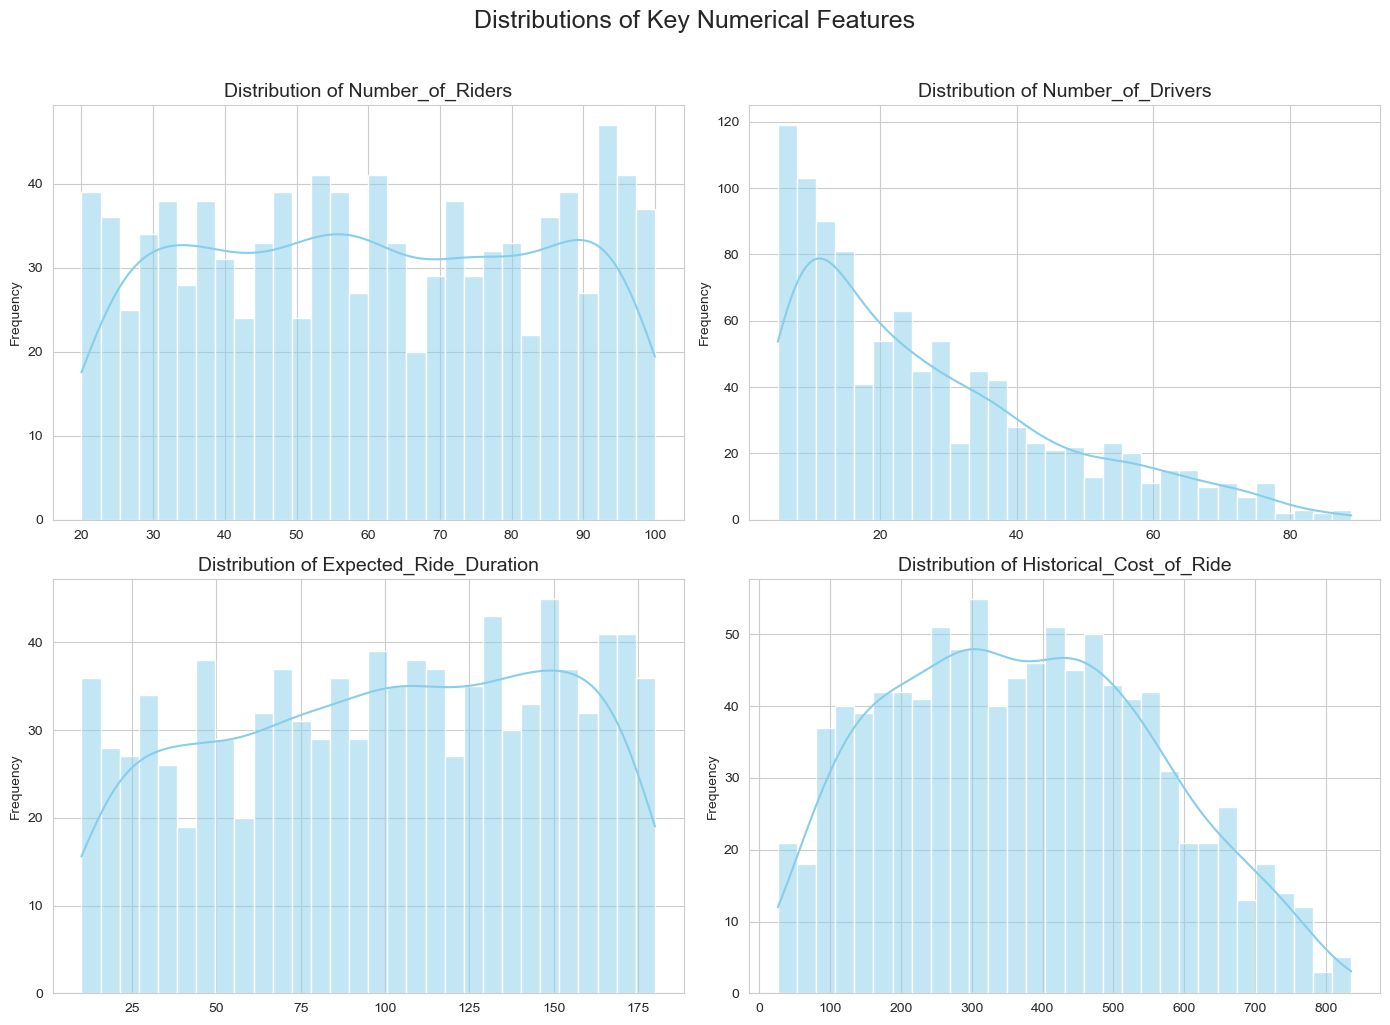

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# Perform the same robust feature engineering from our previous steps
df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1e-6)
df['Cost_per_Min'] = df['Historical_Cost_of_Ride'] / (df['Expected_Ride_Duration'] + 1e-6)
peak_hours_map = {'Evening': 1, 'Night': 1, 'Morning': 0, 'Afternoon': 0}
df['Peak'] = df['Time_of_Booking'].map(peak_hours_map).fillna(0).astype(int)

#1.Numerical Distributions

print("Generating plots for numerical feature distributions...")

# Define the numerical columns you want to inspect
numeric_features = [
    'Number_of_Riders', 
    'Number_of_Drivers', 
    'Expected_Ride_Duration', 
    'Historical_Cost_of_Ride'
]

# Create a figure to hold all the subplots
plt.figure(figsize=(14, 10))

# Loop through each feature and create a histogram with a density plot
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i) # Create a 2x2 grid of plots
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('') # Hide x-axis label for cleaner look
    plt.ylabel('Frequency')

# Add a main title and adjust layout
plt.suptitle('Distributions of Key Numerical Features', fontsize=18, y=1.02)
plt.tight_layout()

# Display the plots
plt.show()

### 2.Boxplots for Outlier View

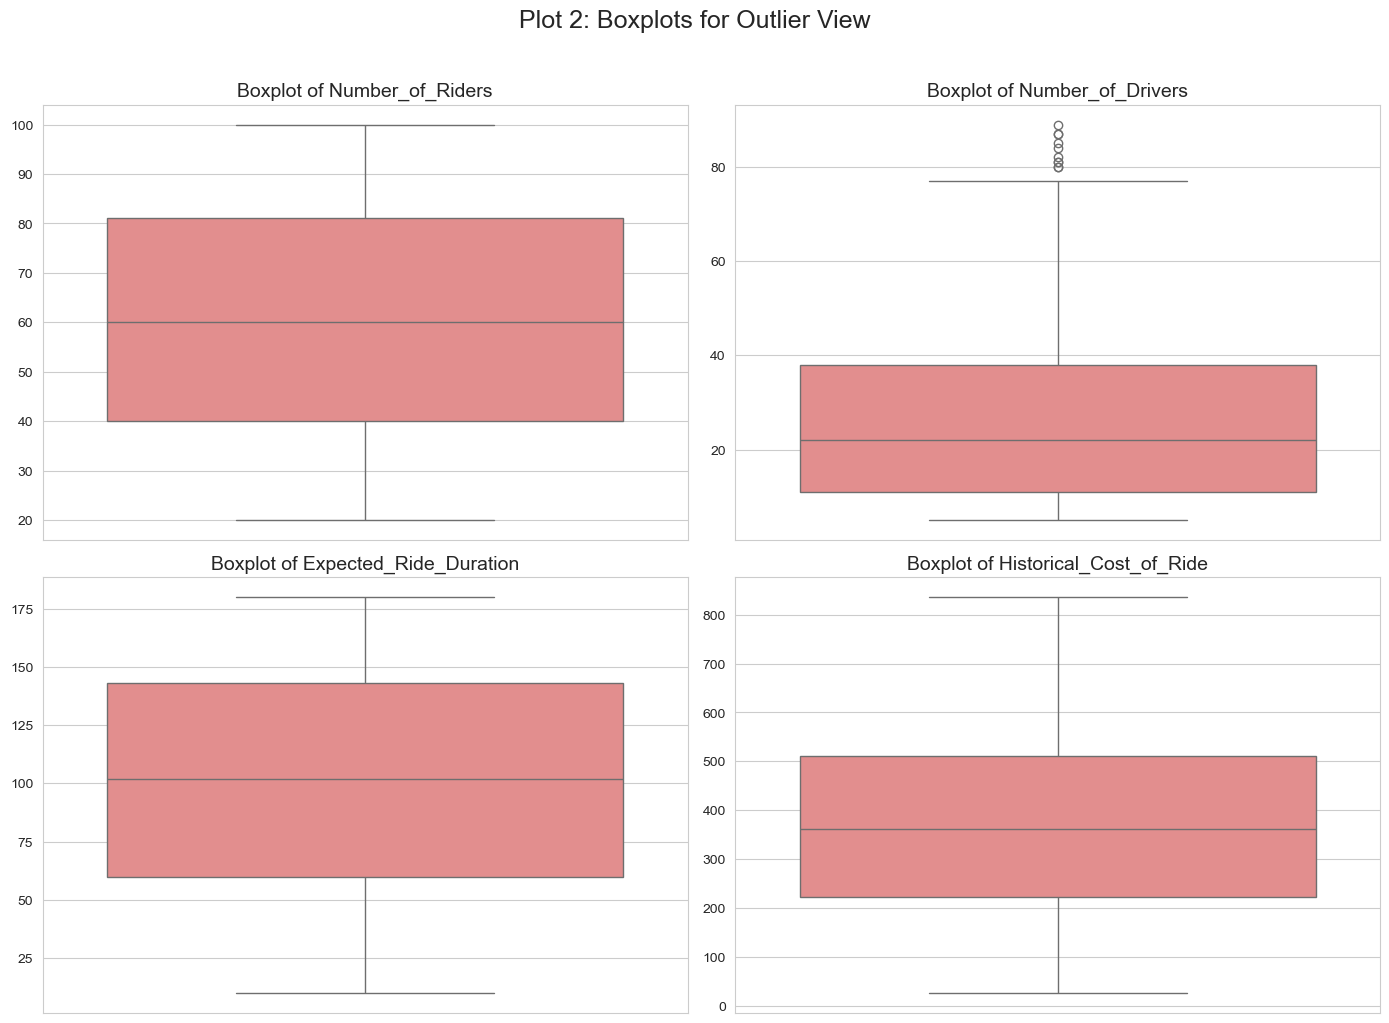

In [22]:
# Define the numerical columns you want to inspect for outliers
numeric_features = [
    'Number_of_Riders', 
    'Number_of_Drivers', 
    'Expected_Ride_Duration', 
    'Historical_Cost_of_Ride'
]

# Create a figure to hold the subplots
plt.figure(figsize=(14, 10))

# Loop through each feature and create a boxplot
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i) # Create a 2x2 grid of plots
    sns.boxplot(y=df[col], color='lightcoral') # Using the y-axis for a vertical plot
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel('') # Hide y-axis label for a cleaner look

# Add a main title for the entire figure and adjust layout
plt.suptitle('Plot 2: Boxplots for Outlier View', fontsize=18, y=1.02)
plt.tight_layout()

# Display the plots
plt.show()

### 3.Categorical Counts

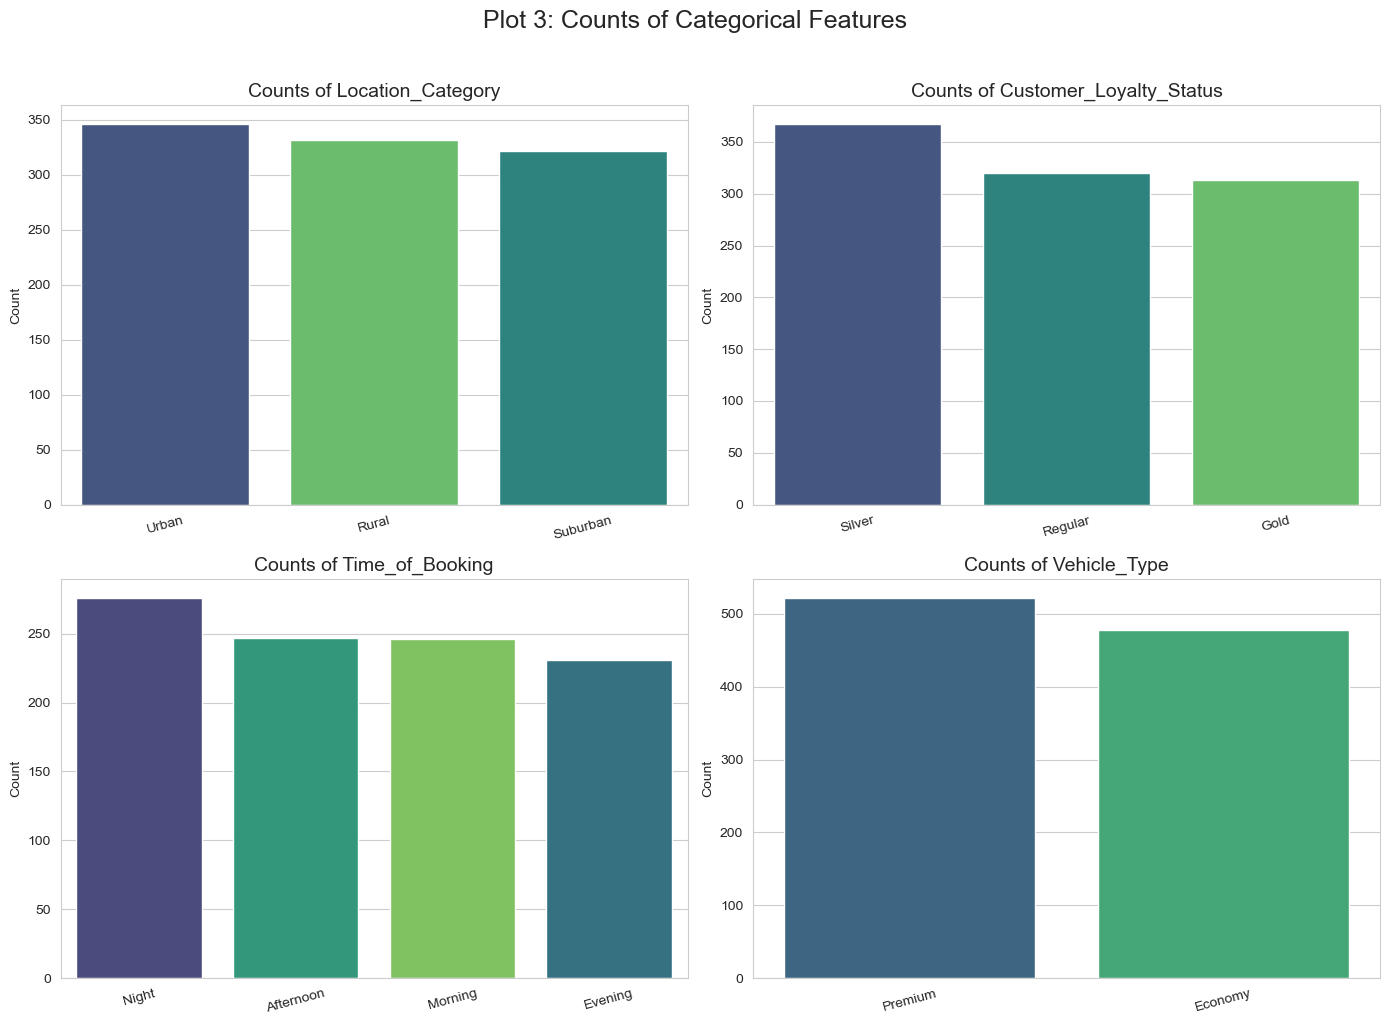

In [24]:
# Define the categorical columns you want to analyze
categorical_features = [
    'Location_Category', 
    'Customer_Loyalty_Status', 
    'Time_of_Booking', 
    'Vehicle_Type'
]

# Create a figure to hold the subplots
plt.figure(figsize=(14, 10))

# Loop through each feature and create a count plot
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i) # Create a 2x2 grid of plots
    
    # CORRECTED LINE: Added hue=df[col] and legend=False
    sns.countplot(x=df[col], order=df[col].value_counts().index, hue=df[col], palette='viridis', legend=False)
    
    plt.title(f'Counts of {col}', fontsize=14)
    plt.xlabel('') # Hide x-axis label for a cleaner look
    plt.ylabel('Count')
    plt.xticks(rotation=15)

# Add a main title for the entire figure and adjust layout
plt.suptitle('Plot 3: Counts of Categorical Features', fontsize=18, y=1.02)
plt.tight_layout()

# Display the plots
plt.show()

### 4.Relationships with Target Variable

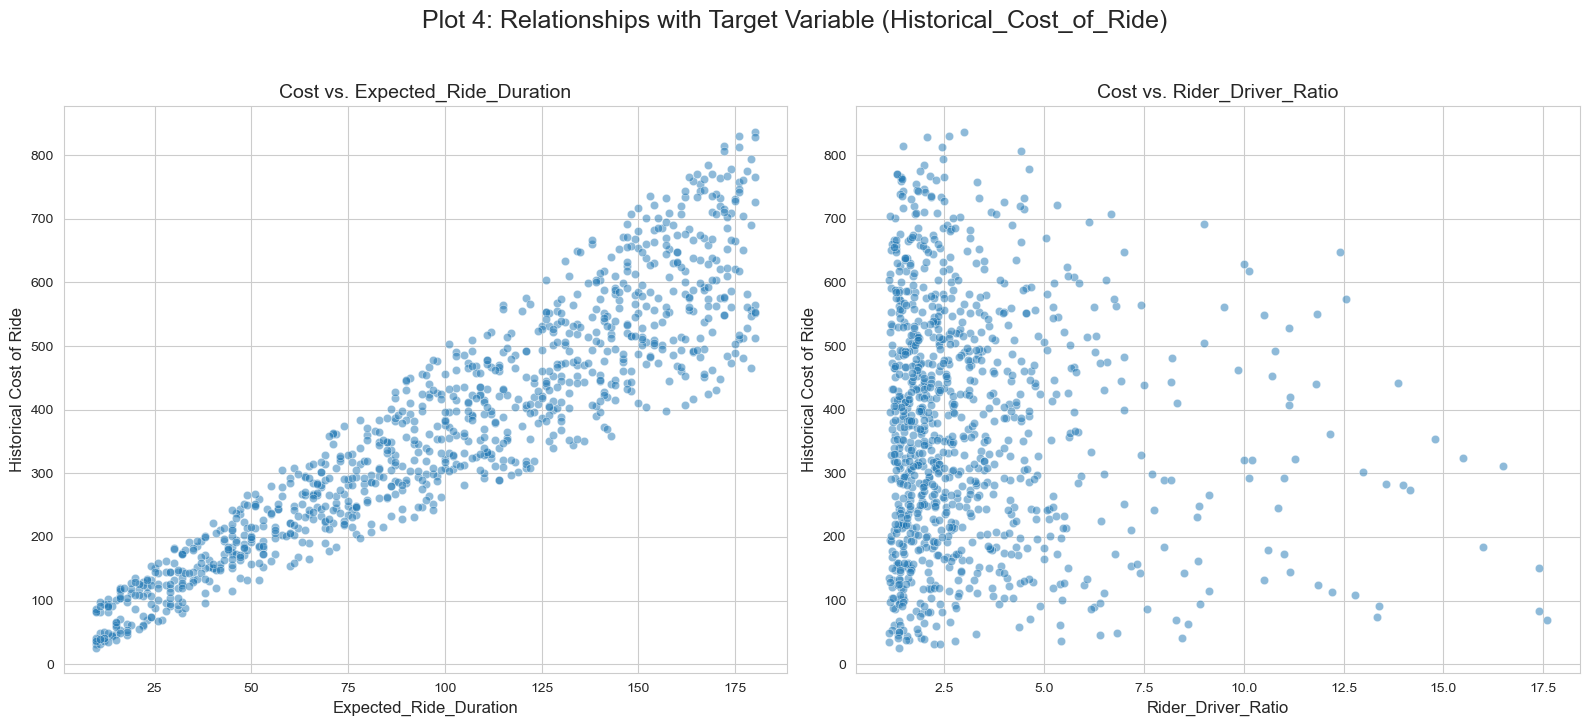

In [25]:
# Define the key features we want to compare against the ride cost
relationship_features = [
    'Expected_Ride_Duration', 
    'Rider_Driver_Ratio'
]

# Create a figure to hold the subplots
plt.figure(figsize=(16, 7))

# Loop through each feature and create a scatter plot
for i, col in enumerate(relationship_features, 1):
    plt.subplot(1, 2, i) # Create a 1x2 grid of plots
    sns.scatterplot(x=df[col], y=df['Historical_Cost_of_Ride'], alpha=0.5)
    plt.title(f'Cost vs. {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Historical Cost of Ride', fontsize=12)

# Add a main title for the entire figure and adjust layout
plt.suptitle('Plot 4: Relationships with Target Variable (Historical_Cost_of_Ride)', fontsize=18, y=1.03)
plt.tight_layout()

# Display the plots
plt.show()